EDA Titanic

In [1]:
#Importer des bibliothèques de fonctions 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()


In [2]:
#Charger les données
df = pd.read_csv('C:/Users/lodss/OneDrive/Bureau/data-portfolio/data-analyst/data/train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Aperçu rapide
df.shape        # lignes, colonnes
df.info()       # types et valeurs manquantes
df.describe()   # stats numériques

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Nettoyage simple
df.isnull().sum()      # repérer et afficher valeurs manquantes
df['Age'] = df['Age'].fillna(df['Age'].median())      # remplacer par la médiane ou créer une flag age_missing
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # remplir par la valeur la plus fréquente

In [5]:
# Features rapides / extraction
    # extraire Title depuis Name (M., Mme, etc.)
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df[['Title','FamilySize']].head()

,Title,FamilySize
0,Mr,2
1,Mrs,2
2,Miss,1
3,Mrs,2
4,Mr,1


Text(0.5, 1.0, 'Survival by Sex')

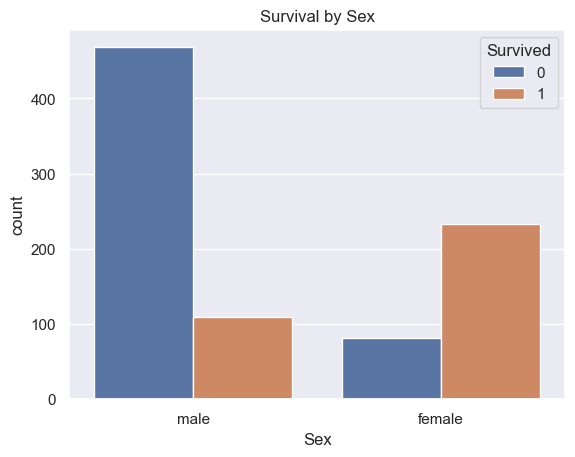

In [6]:
# Visualisations
    # Survival by Sex
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Sex')

Text(0.5, 1.0, 'Age distribution by survival')

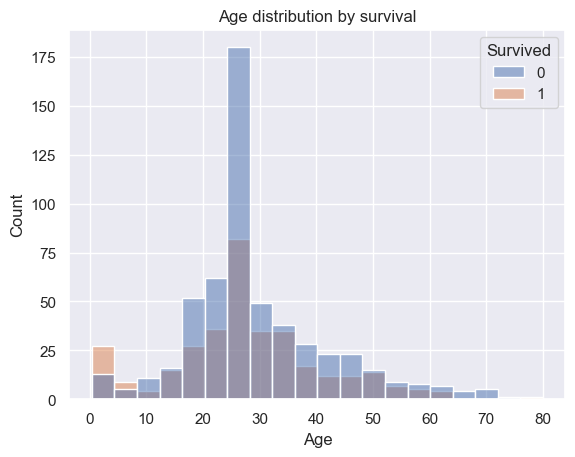

In [7]:
# Visualisation
    # Age distribution (survivors vs non)
sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=False)
plt.title('Age distribution by survival')

Text(0.5, 1.0, 'Survival rate by Pclass')

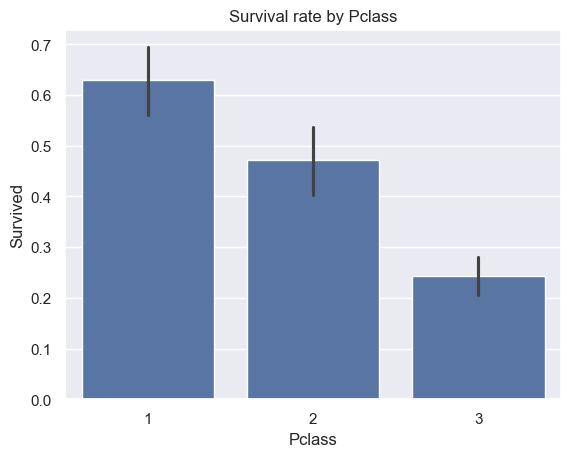

In [8]:
# Visualisation
    # Survival by Pclass
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival rate by Pclass')

- “Les femmes ont un taux de survie plus élevé que les hommes (X% vs Y%).”
- “Les passagers de 1ère classe survivent plus souvent.”
- “Les enfants (Age < 15) ont un taux de survie différent — vérifier.”

In [9]:
# Export résultats
    # Export des données nettoyées et features
df.to_csv('C:/Users/lodss/OneDrive/Bureau/data-portfolio/data-analyst/data/eda_titanic_clean.csv', index=False)